This project involves performing an exploratory data analysis (EDA) on Airbnb listings data for a particular city. The analysis will focus on factors such as price, availability, location, and property type to identify trends and patterns in the demand for Airbnb listings in the city. The project will include data cleaning, visualization, and statistical analysis using tools such as Python and Jupyter Notebook. Data: http://insideairbnb.com/get-the-data/

In [69]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
import seaborn as sns

# read_data

In [70]:
df=pd.read_csv('dataset/listings.csv')

In [71]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Condo in Amsterdam · ★4.89 · 1 bedroom · 2 bed...,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69,3,336,2023-05-31,1.95,1,7,40,NaN
1,20168,Townhouse in Amsterdam · ★4.44 · 1 bedroom · 1...,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-04-09,2.10,2,0,0,NaN
2,213371,Rental unit in Amsterdam · ★4.86 · 3 bedrooms ...,1100324,Hendrik,NaN,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270,4,23,2023-01-08,0.16,1,2,1,0363 F88F 4B47 6E9B 225B
3,155548,Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...,748161,Maria,NaN,Oud-Oost,52.36420,4.92829,Entire home/apt,200,3,21,2019-08-20,0.15,1,0,0,0363 A562 4D7E 4A91 60DF
4,27886,Houseboat in Amsterdam · ★4.94 · 1 bedroom · 1...,97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,137,3,251,2023-05-01,1.81,1,0,20,NaN


# Displaying columns data types

In [72]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

# Checking for missing and null values

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 18 columns):
id                                7608 non-null int64
name                              7608 non-null object
host_id                           7608 non-null int64
host_name                         7608 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     7608 non-null object
latitude                          7608 non-null float64
longitude                         7608 non-null float64
room_type                         7608 non-null object
price                             7608 non-null int64
minimum_nights                    7608 non-null int64
number_of_reviews                 7608 non-null int64
last_review                       6898 non-null object
reviews_per_month                 6898 non-null float64
calculated_host_listings_count    7608 non-null int64
availability_365                  7608 non-null int64
number_of_reviews_l

In [74]:
df.shape

(7608, 18)

In [75]:
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               7608
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        710
reviews_per_month                  710
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1134
dtype: int64

<AxesSubplot:>

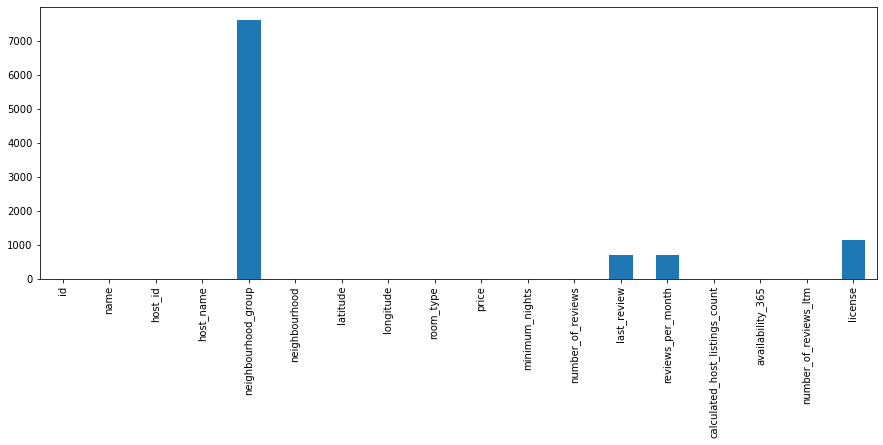

In [76]:

df.isnull().sum().plot.bar(figsize=(15,5))

# data cleaning to remove missing value or fill them.¶

In [77]:
df_final= df.fillna(0)  # Fills missing values with 0


In [78]:
print(len(df))
print(len(df_final))

7608
7608


In [79]:
df_final.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Condo in Amsterdam · ★4.89 · 1 bedroom · 2 bed...,3159,Daniel,0.0,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69,3,336,2023-05-31,1.95,1,7,40,0
1,20168,Townhouse in Amsterdam · ★4.44 · 1 bedroom · 1...,59484,Alexander,0.0,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-04-09,2.10,2,0,0,0
2,213371,Rental unit in Amsterdam · ★4.86 · 3 bedrooms ...,1100324,Hendrik,0.0,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270,4,23,2023-01-08,0.16,1,2,1,0363 F88F 4B47 6E9B 225B
3,155548,Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...,748161,Maria,0.0,Oud-Oost,52.36420,4.92829,Entire home/apt,200,3,21,2019-08-20,0.15,1,0,0,0363 A562 4D7E 4A91 60DF
4,27886,Houseboat in Amsterdam · ★4.94 · 1 bedroom · 1...,97647,Flip,0.0,Centrum-West,52.38761,4.89188,Private room,137,3,251,2023-05-01,1.81,1,0,20,0


In [80]:
df_final.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
dtype: int64

In [81]:
#df_final.select_dtypes(include=['object']).columns

# Data Analysis & Visualization (EDA )

In [82]:
df_final['price'].mean()

251.06558885383808

In [83]:
df_final['price'].max()

12000

In [84]:
df_final['price'].min()

0

In [85]:
df_final['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [86]:
df_final['room_type'].value_counts()

Entire home/apt    5783
Private room       1726
Hotel room           56
Shared room          43
Name: room_type, dtype: int64

In [87]:
df_final[df_final['room_type']=='Shared room'].count()

id                                43
name                              43
host_id                           43
host_name                         43
neighbourhood_group               43
neighbourhood                     43
latitude                          43
longitude                         43
room_type                         43
price                             43
minimum_nights                    43
number_of_reviews                 43
last_review                       43
reviews_per_month                 43
calculated_host_listings_count    43
availability_365                  43
number_of_reviews_ltm             43
license                           43
dtype: int64

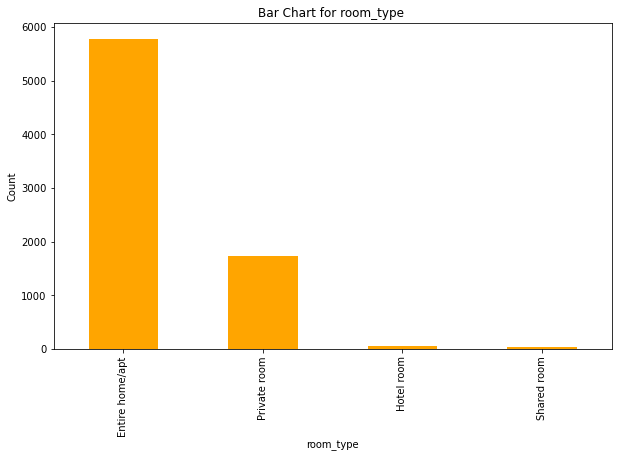

In [88]:
plt.figure(figsize=(10, 6))
df_final['room_type'].value_counts().plot(kind='bar',color='orange')
plt.xlabel('room_type')
plt.ylabel('Count')
plt.title('Bar Chart for room_type ')
plt.show()

In [91]:
df_finals=df_final.groupby("room_type")["price"].sum().reset_index()
df_finals.head()

,room_type,price
0,Entire home/apt,1575308
1,Hotel room,13448
2,Private room,314399
3,Shared room,6952


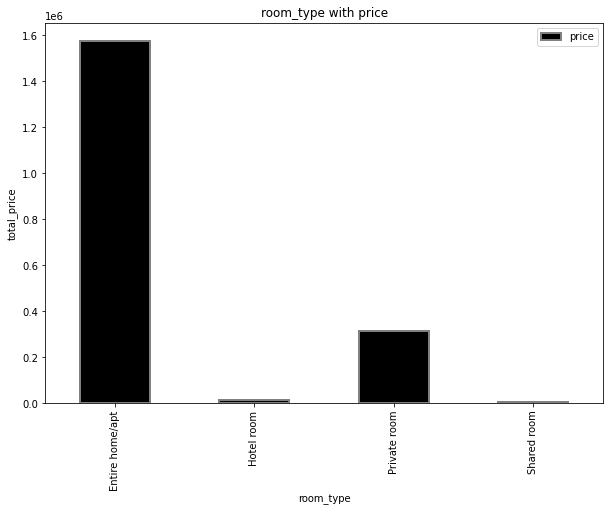

In [92]:
df_finals.plot.bar(x='room_type', y='price',figsize=(10,7),color='black',edgecolor='gray',linewidth=2)
plt.ylabel('total_price')
plt.title('room_type with price')
plt.show()

In [93]:
df_finals=df_final.groupby("minimum_nights")["price"].sum().reset_index()
df_finals.head()

,minimum_nights,price
0,1,344348
1,2,524317
2,3,517203
3,4,201234
4,5,138328


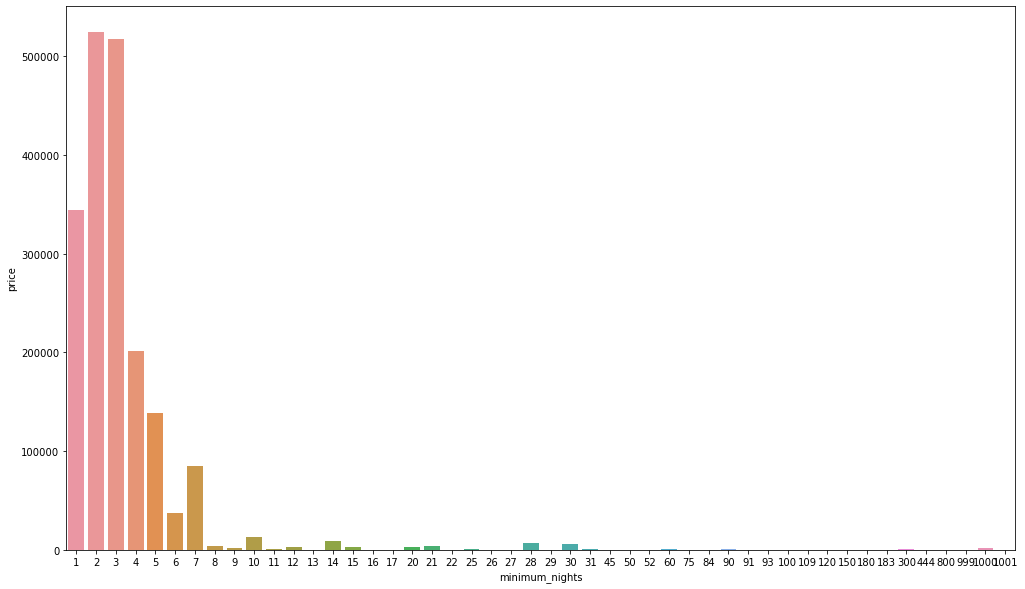

In [94]:

plt.figure(figsize=(17,10))
sns.barplot(x = 'minimum_nights',y = 'price',data =df_finals)
plt.show()

C:\Users\20101\.conda\envs\tenfl\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

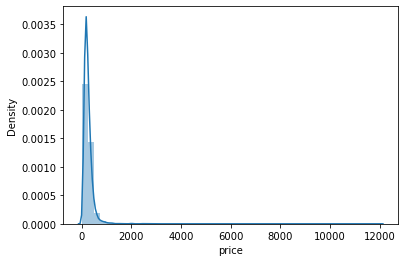

In [95]:
sns.distplot(df_final['price'])

In [96]:
df_finals_rev=df_final.groupby("number_of_reviews")["reviews_per_month"].describe()
df_finals_rev.head(20)

,count,mean,std,min,25%,50%,75%,max
number_of_reviews,,,,,,,,
0,710.0,0.000000,0.000000,0.00,0.0000,0.000,0.0000,0.00
1,451.0,0.443681,0.395661,0.01,0.1000,0.250,1.0000,1.00
2,416.0,0.581707,0.629379,0.02,0.1500,0.260,0.9125,2.00
3,385.0,0.716701,0.820865,0.03,0.2200,0.340,0.9500,3.00
4,306.0,0.655000,0.737032,0.04,0.1800,0.400,0.7700,4.00
5,312.0,0.598173,0.711268,0.05,0.1275,0.410,0.7100,5.00
6,293.0,0.740375,0.982736,0.05,0.1400,0.490,0.7800,6.00
7,267.0,0.715655,0.959529,0.05,0.1500,0.540,0.7550,7.00
8,188.0,0.653191,0.766487,0.07,0.1700,0.465,0.7725,4.62


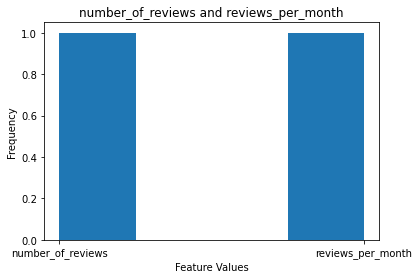

In [97]:
figsize=(10,5)
plt.hist(['number_of_reviews','reviews_per_month'], bins=4, label=['number_of_reviews', 'reviews_per_month'])
plt.title('number_of_reviews and reviews_per_month')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.show()

In [98]:
feature_df=['latitude','longitude']

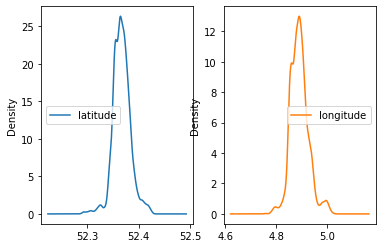

In [99]:
df_final[feature_df].plot(kind='density',subplots=True,layout=(1,2),sharex=False)
plt.show()

In [100]:
count=(df_final['calculated_host_listings_count'].value_counts())

In [101]:
count

1     6064
2      668
3      234
4      108
6      102
5       85
8       64
7       63
9       63
14      28
12      24
22      22
21      21
18      18
17      17
16      16
11      11
Name: calculated_host_listings_count, dtype: int64

In [102]:
count.index.values.tolist()

[1, 2, 3, 4, 6, 5, 8, 7, 9, 14, 12, 22, 21, 18, 17, 16, 11]

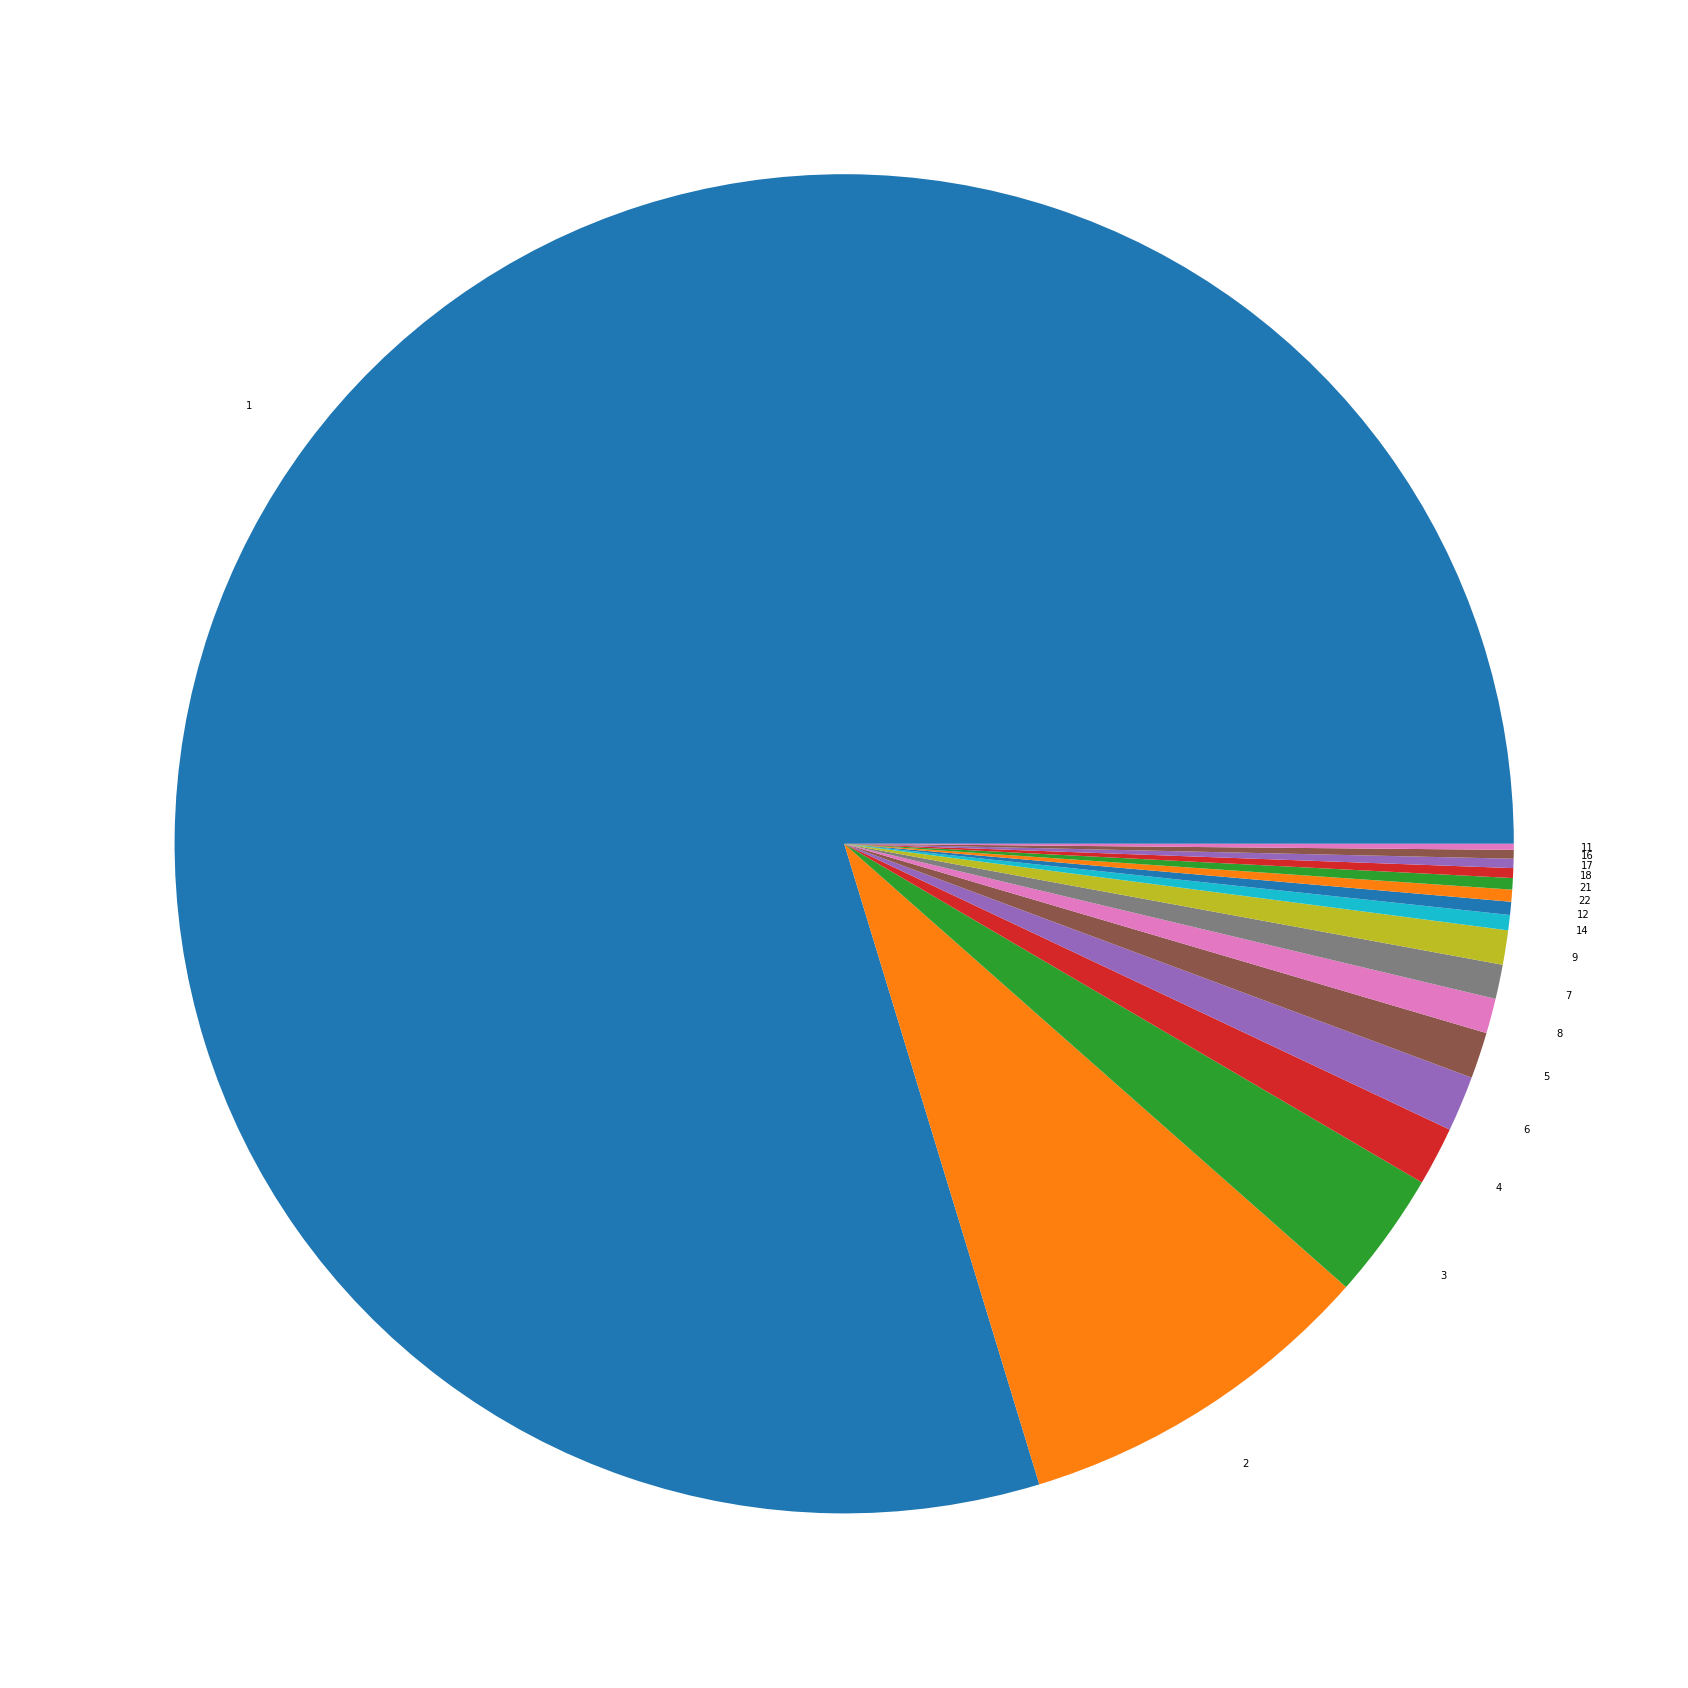

In [68]:
plt.figure(figsize=(30,40))
plt.pie(count,labels=count.index.values.tolist())
plt.show()